# Neural Networks: part II

In this exercise notebook we would like to build and train convolutional neural network (CNN) to recognize images from the CIFAR10 data set. This data set contains 60 thousands colorful images of ten classes related to the thing that image presents: 
airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. 

Each image has low resolution: 32x32 px. However, this resolution let us to build not big enough convolutional neural network that would be able to train withing 5-10 minutes.

First, let us import all basic libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

All required modules for building deep learning classifier which are NN are included in Google Tensorflow 

In [ ]:
import tensorflow

For Multi-Layer-Perceptron we were supposed to prepare particular types of network layers. Now, we need to import two general layers for CNN: Convolution layer, and Pooling layer. Both are prepared to handle 2-dimensional data.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

As mentioned in instruction for this exercise, CNN are main part of our deep approach but the result of convolution and pooling layers is input of classical multi-leyer perceptron. Hence wee need also to import layer that you are already familiar with: Flatten and Dense layers:

In [ ]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

Like before, our CIFAR10 data set is included in keras module called datasets:

In [ ]:
from tensorflow.keras import datasets

In [ ]:
(X_train,y_train), (X_test,y_test) = datasets.cifar10.load_data()

<font color='#FF9700'><strong>(T.3.1)</font><em>  Normalize pixel value [0,255] to the unit interval [0,1] for both training and testing images:

In [ ]:
# put your code here
X_train, X_test = X_train / 255 , X_test / 255




<font color='#FF9700'><strong>(T.3.2)</font><em> If you check y_train, you may see that class names are coded as numbers. According to the description in the beginning of this notebook, prepare class_names vector as standard Python list:

In [ ]:
# put your code here

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


Below code visualizes 25 random images from CIFAR10 with suitable class names:

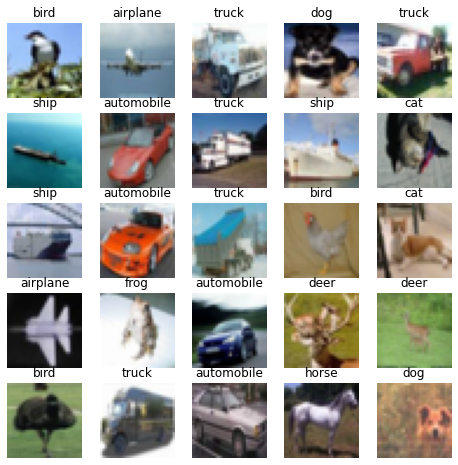

In [ ]:
plt.figure(figsize=(8,8))
for i,j in zip(np.random.randint(0,50000,25),np.arange(25)+1):
    plt.subplot(5,5,j)
    plt.imshow(X_train[i],cmap='gray_r')
    plt.axis('off')
    plt.title(class_names[y_train[i][0]],fontsize=12)
plt.show()

<font color='#FF9700'><strong>(T.3.3)</font><em> Now you are supposed to prepare the first part of our Deep Network. You will prepare five alternating layers of **convolution** and **pooling**:</em></strong>

* First **convolution** layer with 32 x (3x3) kernels and ReLU activation function - this is the first layer hence it need to take parameter 'input_shape' with proper image values (remember that images are RGB images hence each image is 3-dimensional matrix)
* First **pooling** layer (maximum) with depth 2x2
* Second **convolution** layer with 64 x (3x3) kernels and ReLU activation function
* Second **pooling** layer (maximum) with depth 2x2
* Third **convolution** layer with 64 x (3x3) kernels and ReLU activation function

In [ ]:
net = Sequential()
net.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
net.add(MaxPooling2D((2, 2)))
net.add(Conv2D(64, (3, 3), activation='relu'))
net.add(MaxPooling2D((2, 2)))
net.add(Conv2D(64, (3, 3), activation='relu'))

Now we can use net.summary() function to see how the convolution part of the network looks like (Are you able to check how the total number of parameters is calculated?)

In [ ]:
net.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

<font color='#FF9700'><strong>(T.3.4)</font><em> When convolution/pooling part is prepared we can transform our two-dimensional pipeline output matrix into classic MLP structure. Add following layers:</em></strong>

* Flatten layer (you do not need to set input_size hence it would connect with last convolution layer)
* Dense layer (64 neurons, ReLU activation function)
* Output dense layer (with number of neurons compatible with number of classes)

In [ ]:
# put your code below
# net.add() # Flatten layer
# net.add() # First dense layer
# net.add() # Second dense layer
net.add(Flatten())
net.add(Dense(64, activation='relu'))
net.add(Dense(10))

Let us repeat net.summary() to see how the full network looks like and check the number of trainable parameters:

In [ ]:
net.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

Now we will use net.compile() function and execute training of the CNN (caution: the training may last for about 10 minutes according to the computational resources). This time, net.compile() function takes:</strong>

* ADAptive learning rate optiMization (coded as 'adam') as optimizer parameter
* from tensorflow -> keras -> losses, we are taking the Sparse Categorical Crossentropy as the loss function, with processing y as logit function
* accuracy as metrics parameter value

In [ ]:
net.compile(optimizer='adam',
            loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

<font color='#FF9700'><strong>(T.3.5)</font><em> If the CNN compilation finished successfully, you are able to execute ".fit" method and follow the process of training. </strong> Please, execute net.fit() function giving suitable parameters, i.e. training images X_train, training class names y_train, set number of epochs less than or equal 10, CAUTION: this time you are supposed to add another parameter which is 'validation_data' where we need to indicate tuple: (X_test,y_test))

In [ ]:
# put your code here
training_result=net.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.5115 - accuracy: 0.4476 - val_loss: 1.2139 - val_accuracy: 0.5680
Epoch 2/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.1226 - accuracy: 0.6045 - val_loss: 1.0398 - val_accuracy: 0.6327
Epoch 3/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.9718 - accuracy: 0.6600 - val_loss: 1.0057 - val_accuracy: 0.6478
Epoch 4/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.8856 - accuracy: 0.6900 - val_loss: 0.9639 - val_accuracy: 0.6636
Epoch 5/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8180 - accuracy: 0.7142 - val_loss: 0.8810 - val_accuracy: 0.6937
Epoch 6/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7589 - accuracy: 0.7336 - val_loss: 0.9044 - val_accuracy: 0.6934
Epoch 7/10
1563/1563 [==============================] - 76s 48ms/step - loss: 0.7156 - accuracy: 0.7497 - val_loss: 0.8681 -

As before we would like to predict testing images from X_test (this time, we would execute net.predict command and next we will extract predicted class index according to the maximal output value of CNN (just like in former laboratory but this time in one line)

In [ ]:
y_pred = np.argmax(net.predict(X_test),axis=-1)

Let us reshape y_test vector for correct comparison with y_pred:

In [ ]:
y_test = y_test.reshape(10000,)

As before we would like to extract information about misclassified images, hence the code is the same as for the former laboratory exercise:

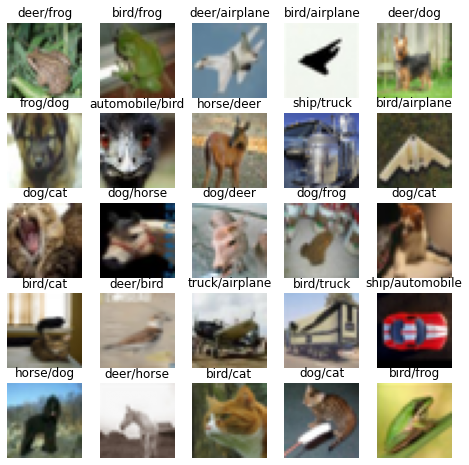

In [ ]:
ind = y_pred != y_test
y_bad = np.arange(10000)
y_bad = y_bad[ind]
plt.figure(figsize=(8,8))
for i,j in zip(y_bad[:25],np.arange(25)+1):
    plt.subplot(5,5,j)
    plt.imshow(X_test[i],cmap='gray_r')
    plt.axis('off')
    plt.title('%s/%s' %(class_names[y_pred[i]],class_names[y_test[i]]),fontsize=12)
plt.show()

Learning process of the CNN was quite long and in each epoch we obtained the training accuracy and testing accuracy, both can be extracted from training_result that saves all information about training and testing process (below code prepares suitable figure):

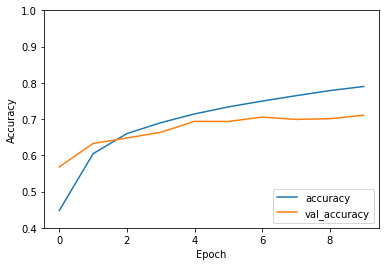

In [ ]:
plt.plot(training_result.history['accuracy'],label='accuracy')
plt.plot(training_result.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4,1])
plt.legend(loc='lower right')

Let us predict testing data ones again and validate what is the 10-valued output of the CNN and how final decision is made by CNN:

Text(0.5, 1.0, 'real class is deer')

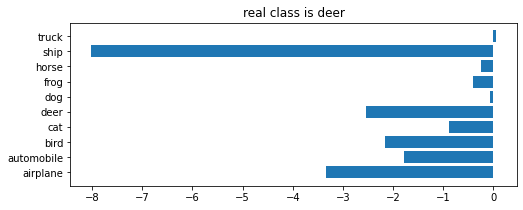

In [ ]:
yy_pred = net.predict(X_test)
plt.figure(figsize=(8,3))
ind = np.random.randint(0,len(y_bad),1)[0]
plt.barh(np.arange(10),yy_pred[y_bad[ind],:])
plt.yticks(ticks=[0,1,2,3,4,5,6,7,8,9],labels=class_names)
plt.title('real class is '+str(class_names[y_test[y_bad[ind]]]))